# Sentiment Analysis for Yelp reviews

In [2]:
#Importing libraries

#For handling data
import numpy as np
import pandas as pd

#For natural language processing
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

#for visualising data
from wordcloud import WordCloud
import seaborn as sns

#Basic
import re, string
import sys
import time

In [3]:
yelp = pd.read_csv('yelp_review.csv')

In [4]:
yelp.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [6]:
yelp.shape

(5261668, 9)

In [7]:
yelp['review length'] = yelp['text'].apply(len)

In [8]:
yelp.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,review length
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,213
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,502
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,373
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,523
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,231


(array([341699., 218313.,  88686.,  39641.,  19196.,   9901.,   5529.,
          3214.,   2036.,   3148.]),
 array([1.0000e+00, 5.0650e+02, 1.0120e+03, 1.5175e+03, 2.0230e+03,
        2.5285e+03, 3.0340e+03, 3.5395e+03, 4.0450e+03, 4.5505e+03,
        5.0560e+03]),
 <BarContainer object of 10 artists>)

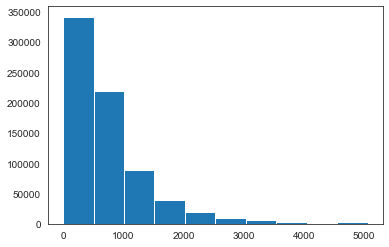

In [9]:
import matplotlib.pyplot as plt
#Plotting histograms for the length of review wrt to the stars that were given
sns.set_style('white')
%matplotlib inline
star1 = yelp.loc[yelp['stars']==1]
plt.hist(star1['review length'])

(array([191404., 140078.,  58910.,  24974.,  11265.,   5479.,   2635.,
          1443.,    830.,   1143.]),
 array([1.0000e+00, 5.0590e+02, 1.0108e+03, 1.5157e+03, 2.0206e+03,
        2.5255e+03, 3.0304e+03, 3.5353e+03, 4.0402e+03, 4.5451e+03,
        5.0500e+03]),
 <BarContainer object of 10 artists>)

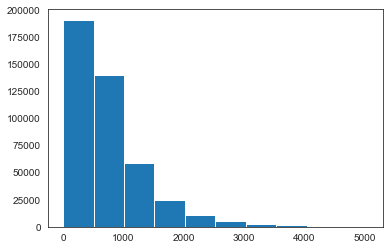

In [10]:
star2 = yelp.loc[yelp['stars']==2]
plt.hist(star2['review length'])

(array([283854., 197566.,  78176.,  31126.,  12881.,   5796.,   2908.,
          1364.,    810.,   1000.]),
 array([1.000e+00, 5.040e+02, 1.007e+03, 1.510e+03, 2.013e+03, 2.516e+03,
        3.019e+03, 3.522e+03, 4.025e+03, 4.528e+03, 5.031e+03]),
 <BarContainer object of 10 artists>)

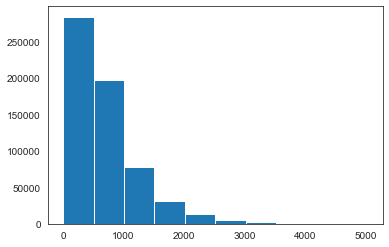

In [11]:
star3 = yelp.loc[yelp['stars']==3]
plt.hist(star3['review length'])

(array([657721., 354162., 128363.,  47590.,  18790.,   8277.,   3951.,
          2008.,   1139.,   1315.]),
 array([1.0000e+00, 5.0610e+02, 1.0112e+03, 1.5163e+03, 2.0214e+03,
        2.5265e+03, 3.0316e+03, 3.5367e+03, 4.0418e+03, 4.5469e+03,
        5.0520e+03]),
 <BarContainer object of 10 artists>)

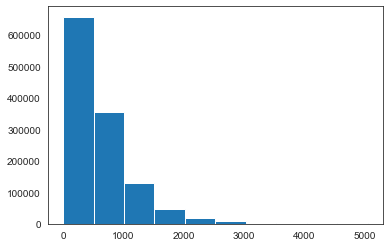

In [12]:
star4 = yelp.loc[yelp['stars']==4]
plt.hist(star4['review length'])

(array([1.522096e+06, 5.044990e+05, 1.411810e+05, 4.898800e+04,
        1.919300e+04, 8.422000e+03, 3.973000e+03, 2.073000e+03,
        1.298000e+03, 1.624000e+03]),
 array([1.0000e+00, 5.0610e+02, 1.0112e+03, 1.5163e+03, 2.0214e+03,
        2.5265e+03, 3.0316e+03, 3.5367e+03, 4.0418e+03, 4.5469e+03,
        5.0520e+03]),
 <BarContainer object of 10 artists>)

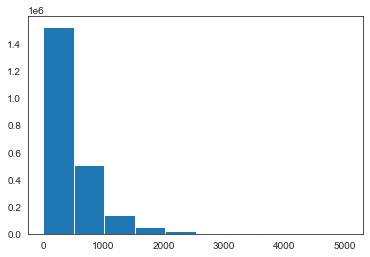

In [13]:
star5 = yelp.loc[yelp['stars']==5]
plt.hist(star5['review length'])

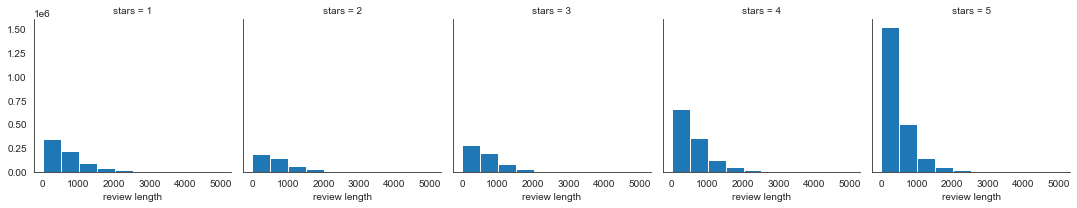

In [14]:
import seaborn as sns
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'review length')

In [15]:
badReviews = yelp[(yelp.stars <=2)]
goodReviews = yelp[(yelp.stars>=4)]

In [16]:
badReviewsText =badReviews.text
goodReviewsText = goodReviews.text

In [17]:
badReviewsText.head()

12    I thought Tidy's Flowers had a great reputatio...
16    I too have been trying to book an appt to use ...
19    really excited to hear of this restaurant comi...
23    Food is very bland - not authentic at all.\n\n...
26    a few years ago, this used to be the place to ...
Name: text, dtype: object

In [18]:
goodReviewsText.head()

0    Super simple place but amazing nonetheless. It...
1    Small unassuming place that changes their menu...
2    Lester's is located in a beautiful neighborhoo...
3    Love coming here. Yes the place always needs t...
4    Had their chocolate almond croissant and it wa...
Name: text, dtype: object

In [19]:
#We consider only 10% of the data to speed up the process.

In [20]:
badReviewsText1 = badReviewsText.sample(frac = .001, replace = True )
goodReviewsText1 = goodReviewsText.sample(frac= .001, replace = True)

Now we will see the most frequent N-grams in the given data

In [21]:
#converting all strings to lower case and splitting into words
def tokenize(s):
    word_list = re.findall(r'\w+',s.lower())
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    return filtered_words

In [22]:
def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)
    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1
                # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams

In [23]:
def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-word phrase -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

In [24]:
def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
            for gram, count in ngrams[n].most_common(num):
                s = ' '.join(gram)
                words.append(s)
            
    cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

In [25]:
import collections
from collections import Counter


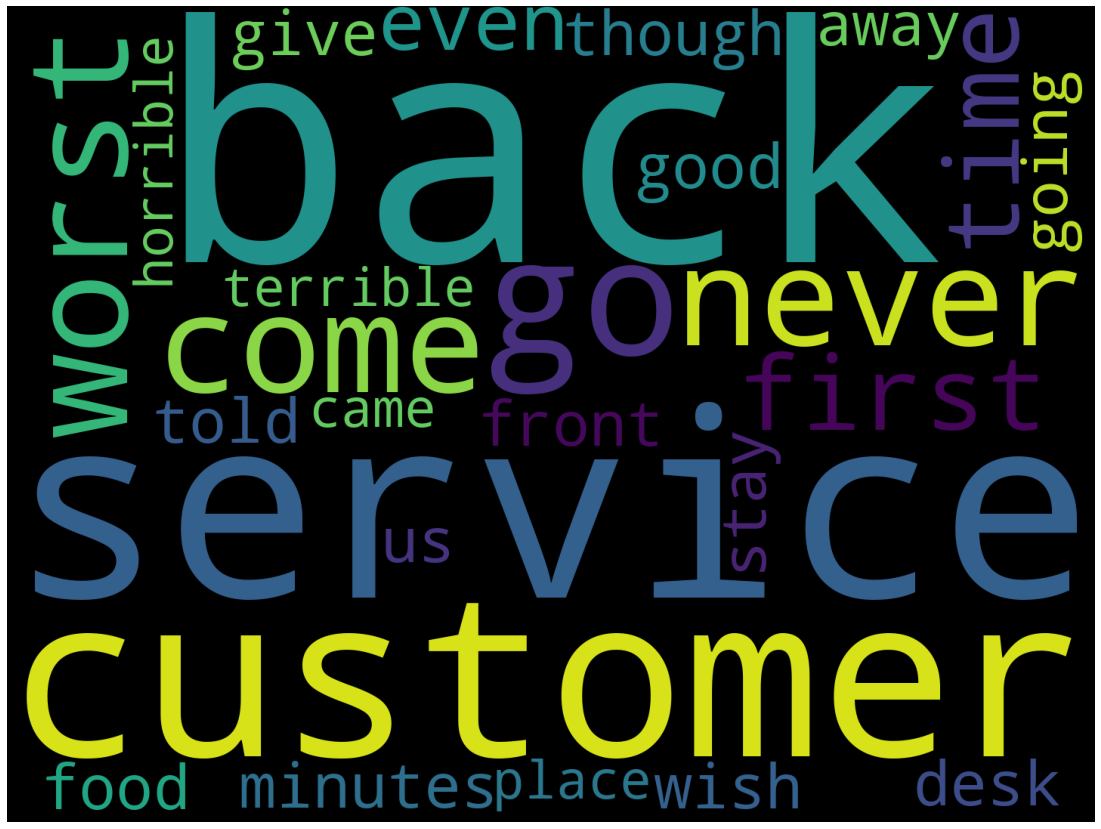

In [26]:
most_frequent_badreviews = count_ngrams(badReviewsText1,max_length=3)
print_word_cloud(most_frequent_badreviews, 10)

In [27]:
print_most_frequent(most_frequent_badreviews, num= 10)

----- 10 most common 2-word phrase -----
customer service: 145
go back: 66
first time: 49
come back: 45
even though: 38
food good: 37
20 minutes: 37
going back: 35
told us: 33
front desk: 30

----- 10 most common 3-word phrase -----
never go back: 17
would go back: 11
worst service ever: 10
wish could give: 9
stay away place: 8
horrible customer service: 7
would come back: 7
worst customer service: 7
terrible customer service: 6
never came back: 6



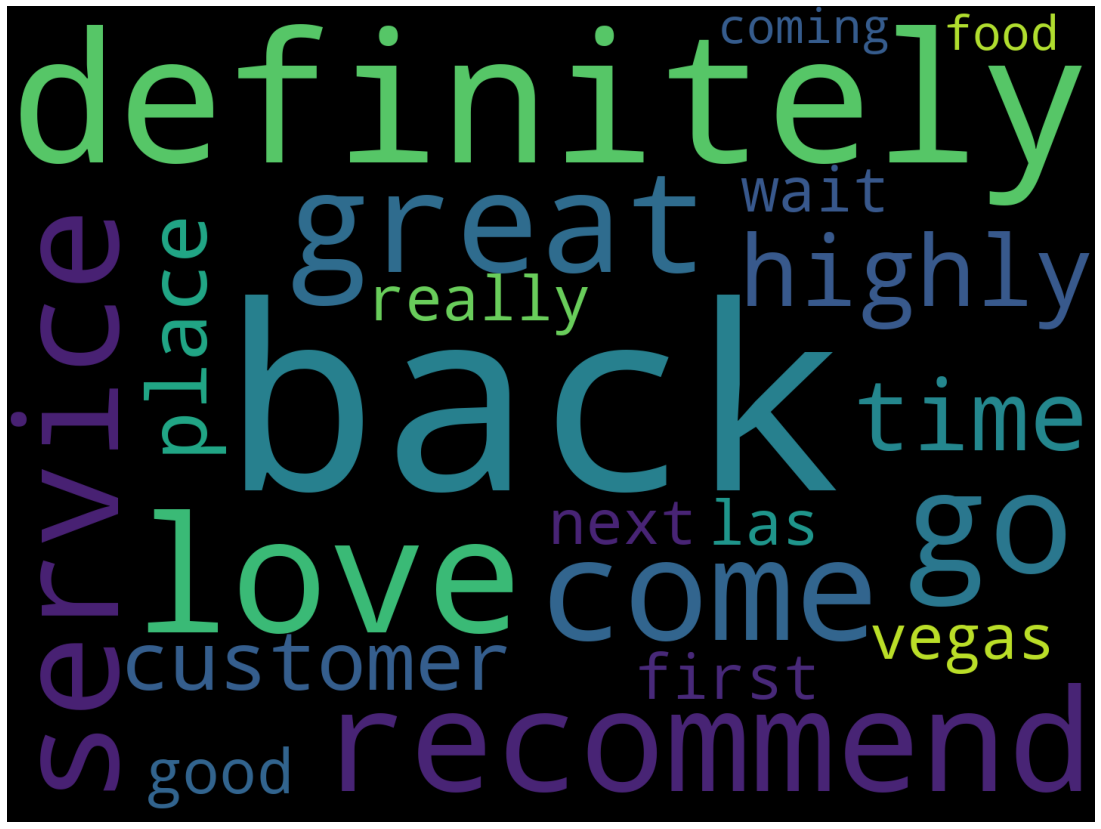

In [28]:
most_frequent_goodreviews = count_ngrams(goodReviewsText1,max_length=3)
print_word_cloud(most_frequent_goodreviews, 10)

In [29]:
print_most_frequent(most_frequent_goodreviews, num= 10)

----- 10 most common 2-word phrase -----
highly recommend: 196
first time: 144
customer service: 134
really good: 122
love place: 121
go back: 119
come back: 118
great place: 115
next time: 113
las vegas: 113

----- 10 most common 3-word phrase -----
would highly recommend: 33
definitely come back: 32
wait go back: 27
definitely go back: 26
great customer service: 21
would definitely recommend: 21
love love love: 18
would definitely come: 18
definitely coming back: 17
service great food: 17

